# Week 5: Downstream Analysis for Differential Gene Expression
# Tutorial Module
In the previous module, we compiled a set of genes whose expression levels chaged in response to dexamethasone treatment. We were able to identify markers for certain pathological conditions, such as depression, validating previous reports. However, we can still glean more information out of this dataset. In this module, we will investigate the results further to gain a more hollistic view of the effects of the treatment from a transcriptomics point of view. To do so, we will create a volcano plot to visualize the gene regulation across all genes, create a heatmap to visualize scaled gene expression data of a subset of genes across samples. Lastly, we will perform a functional analysis to see which biological pathways are regulated.


## Learning objectives
By the end of this module, you should be able to complete the following tasks
- Construct a volcano plot for visualizing the differentially expressed genes
- Perform a functional analysis on a list of differentially expressed genes
- Interpret the results of the downstream analysis in a biological context

| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| function_name() | *input_parameters* | *small description of output produced* | *syntax of output* |

## Data Importation

Continuing where we left off last week, we will import the result dataframe. Feel free to use the one you obtained last week, but if you are concerned about inconsistency, you may import the one we have prepared in the following cell.

**Q1. The file is `DGE_results.csv`. Use the `pd.read_csv()` function to import the data as `res_df`. You may want to set the `index_col` parameter in the function to 0 so that the function will treat the first column in the CSV file as the filenames.**

In [ ]:
# TODO: Write code below
# import pandas
import pandas as pd
# import csv
res_df = pd.read_csv('DGE_results.csv')

res_df

FileNotFoundError: [Errno 2] No such file or directory: 'DGE_results.csv'

## Heatmaps and Clustermaps

Visualizing the extensive amount of data that is generated from a bulk RNA sequencing experiment in an easily interpretable way can be challenging. There are many complex methods which can be used to visualize gene expression data, some of which are currently being used in the field, however a clear message can still be made through the a relatively simple heatmap of gene expression data.

**Understanding Heatmaps**

Heatmaps display gene expression data in a grid format, with each block of the grid corresponding to the expression of a single gene for an individual sample.

**on the x-axis:** we typically display sample name information, grouped by samples from different conditions in the experiment.

**on the y-axis:** we typically display gene name information, usually a subset from the entire data set for ease of interpretation. This subset of genes is typically chosen by the significance value of the differential expression of that gene across all samples. The number of genes can range anywhere from 5-100, and sometimes even more, but the best choice usually depends on the message that is trying to be made. For this exercise we will be arbitrarily selecting the top 20 most significantly differentially expressed genes.

Although in this exercise we will stick to the convention of keeping sample name on the x-axis and gene information on the y-axis, the axes of a heatmap can be swapped and still display the same message. The orientation of the graph will often depend on the needs of the final manuscript.

**Understanding Clustermaps**

Clustermaps are simply a variation of heatmaps where either the rows or columns of the heatmap are clustered based on correlation. In the visualization of bulk RNA sequencing data, another common practice is to cluster the genes based on similar variations. This is done through comparing the gene expression across the sample to capture genes that are being regulated together in each of the treatment conditions. For this exercise we will demonstrate how to visualize clustered genes, but will not go into the details of clustering, which were covered in the week 1 module.



The following code will first demonstrate how a heatmap can be generated to display the top 30 most significantly differentially expressed genes across our treatment and control samples. This will be done through the following steps:

1. load both DGE_results.csv and airway_rawcounts.csv datasets
2. From DGE_results.csv, select the top 20 most significantly differentially expressed genes based on the adjusted p-values column of the dataset
3. from airway_rawcounts.csv, we use the list of genes generated from DGE_results.csv in the previous step to get the raw count expression data of each of the subsetted genes for all samples
4. map the "ensgene" code for each gene to the to gene "Symbol" to display interpresable gene names for each gene
5. apply a zscore normalization on the raw count data across samples for each the gene to scale the gene expression data into a more easily interpretable format for plotting via a heatmap. This will be done using the zscore() function from the scipy.stats library
5. generate a plot using the heatmap() function from the seaborn library

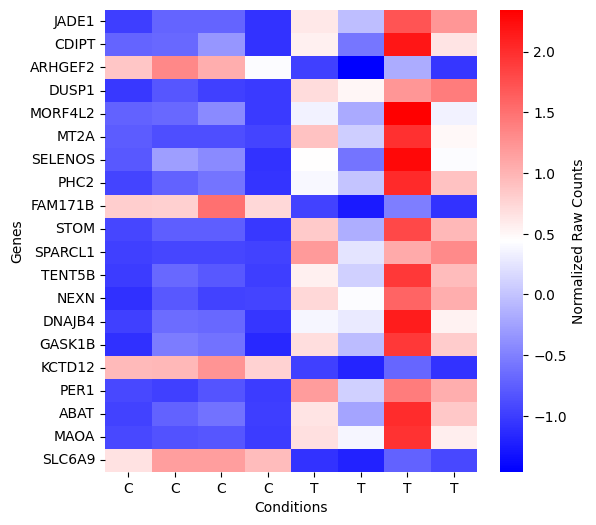

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# load both datasets
res_df = pd.read_csv('DGE_results.csv')

analysis_results_df = res_df.copy()
raw_count_df = pd.read_csv("airway_rawcounts.csv")

# select the top 20 most significantly differentially expressed genes
significant_genes = analysis_results_df.sort_values("padj", ascending=True).head(20)["ensgene"]

# retreive the raw count expression data on the top 20 genes
filtered_df = raw_count_df[raw_count_df["ensgene"].isin(significant_genes)]

# match gene ensgene name to Symbol name
symbol_df = analysis_results_df[['ensgene', 'Symbol']]
filtered_df = pd.merge(filtered_df, symbol_df, on='ensgene')
filtered_df = filtered_df.drop(columns=["ensgene"])
filtered_df.set_index('Symbol', inplace=True)

# rename columns to indicate treatment or control group
# this information was provided in the previous module
filtered_df = filtered_df.rename(columns=dict(zip(filtered_df.columns, ['C', 'T', 'C', 'T', 'C', 'T', 'C', 'T'])))
filtered_df = filtered_df.sort_index(axis=1)

normalized_filtered_df = stats.zscore(filtered_df,axis=1)

plt.figure(figsize=(6, 6))
sns.heatmap(normalized_filtered_df,
                cmap='bwr',
                fmt=".2f",
                cbar_kws={'label': 'Normalized Raw Counts'},
                )
plt.ylabel('Genes')
plt.xlabel('Conditions')
plt.show()

The following code will now demonstrate how a clustermap can be generated from the same filtered and normalized set of gene expression data.

<Figure size 600x600 with 0 Axes>

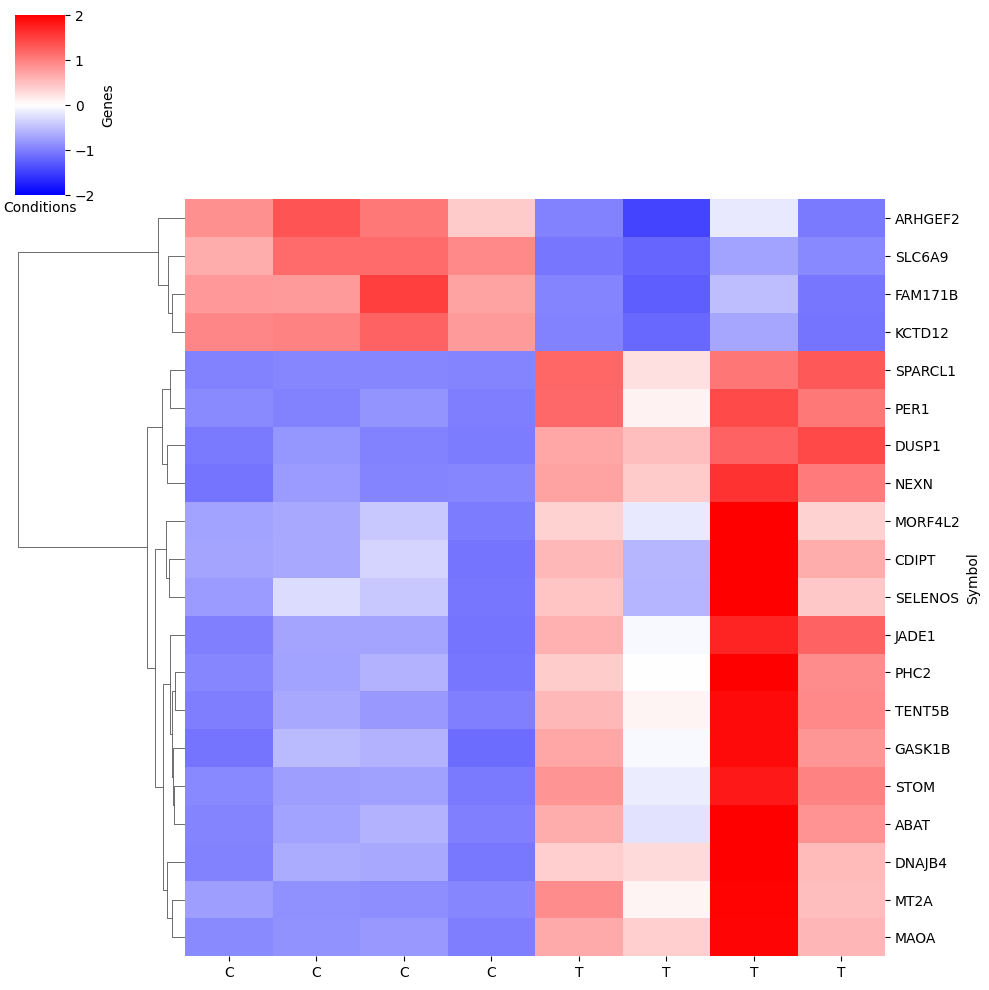

In [ ]:
plt.figure(figsize=(6, 6))
sns.clustermap(normalized_filtered_df,
                cmap='bwr',
                fmt=".2f",
                cbar_kws={'label': 'Normalized Raw Counts'},
                col_cluster=False,
                vmax=2,
                vmin=-2
                )
plt.ylabel('Genes')
plt.xlabel('Conditions')
plt.show()

Let's examine the difference in the heatmap and clustermap we just generated. By clustering the genes based on similar variations in expression across sample in the clustermap, we can begin to more clearly visualize genes that are being regulated together in the treatment group, possibly in response to the drug treatment, in comparison to the control group.

Now let's try something unconventional. Let's try plot the gene expression data but without normalization.

**Complete the code block below**

In [ ]:
# TODO: identify which dataframe from the above code provides the non-normalized raw gene expression data
# for the filtered set of genes. Create another clustermap with this dataframe instead.

# TO BE REMOVED IN STUDENT VERSION
#plt.figure(figsize=(6, 6))
#sns.clustermap(filtered_df,
#                cmap='bwr',
#                fmt=".2f",
#                cbar_kws={'label': 'Normalized Raw Counts'},
#                col_cluster=False,
#                vmax=2,
#                vmin=-2
#                )
#plt.ylabel('Genes')
#plt.xlabel('Conditions')
#plt.show()

**Q1. What differences can you see between this new non-normalized plot and the original clustermap. What do you think is the importance of normalization between genes in clustering and visualizing of gene expression data?**

**Write Answer Below**

possible answer: we can see clear patterns of similarly regulated genes in the original plot that are no longer visible in the new non-normalized plot. It also makes gene expression data more comparable between genes. Normalization is a key step in clustering because genes that have different levels of expression overall can still share similar changes in expression between conditions, and therefore also important in visualization.

## Volcano Plots
We have already performed some simple analysis of our results, but what if we were interested in a visual representation of how many genes are differentially expressed and to what extent? A great way to do so is to use a volcano plot. This popular graph is simply a scatter plot that plots the fold-changes against the adjusted p-values for each gene.

**Understanding Volcano Plots**

Each point represents a gene from our results list.

- **On the x-axis**: The log2 fold change, which reflects the magnitude and direction of change in gene expression between two conditions.
- **On the y-axis**: The negative log10 p-value, which ranks genes by the significance of their expression differences. Genes higher up on the plot are more statistically significant. The adjusted p-value is negative so that the more significant the gene is differentially expressed, the higher it will be on the plot.

The provided code snippet generates a volcano plot from a dataset of gene expression results. Here's what it accomplishes and what you should interpret:

1. **Fold change threshold**: A gene must exhibit an absolute log2 fold change greater than a specified value (in this case, 1 or a 2 times fold change) to be considered significantly up- or down-regulated. This threshold is used to focus on genes with substantial changes in expression.

2. **p-value threshold**: A gene must have an adjusted p-value lower than a specified threshold (here, 0.05) to be considered statistically significant. This threshold helps control the false discovery rate, reducing the likelihood of identifying genes as significant due to random chance.

Both of these values are arbitrary and should be set based on the strigency required for your analysis. But for most studies, they usually follow a common threshold (like how p-value significance is usually designated as less than or equal to 0.05).

**Interpretation**:

- Genes that meet or are beyond both thresholds are highlighted in color on the plot. These are the genes that show both a significant change in expression level and a high level of statistical confidence in that change.
- The top 10 most significant genes, based on the adjusted p-value, are labeled with their gene symbols. These are potential candidates for further biological validation and study, as they are the most statistically significant findings from the analysis.

From this plot, you should be able to visually identify which genes have significant changes in expression and are thus candidates for further biological investigation. The plot emphasizes genes that are both statistically significant and have large differences in expression levels.

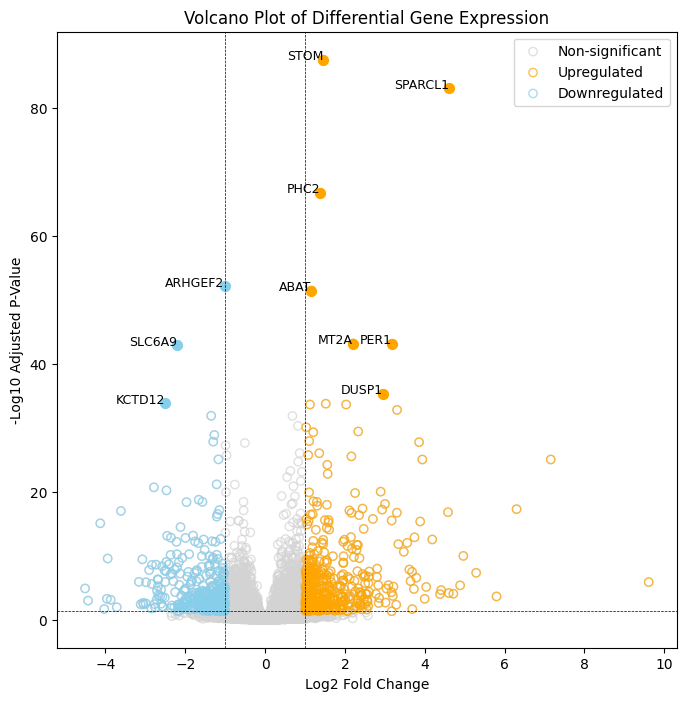

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Making the plot square
plt.figure(figsize=(8, 8))  # Equal width and height for a square plot

# Selecting significance threshold
sig_threshold = 0.05  # Adjusted p-value threshold for significance
log2fc_threshold = 1  # log2 fold change threshold for significance

# Calculating -log10 of the significance threshold for plotting
sig_line = -np.log10(sig_threshold)

# Identifying the top 10 most significant genes
top_genes = res_df.sort_values('padj', ascending=True).head(10)

# Plotting all points as hollow, with significant ones in color
plt.scatter(res_df['log2FoldChange'], -np.log10(res_df['padj']), edgecolors='lightgray', facecolors='none', label='Non-significant', alpha=0.7)
plt.scatter(res_df[(res_df['log2FoldChange'] > log2fc_threshold) & (res_df['padj'] < sig_threshold)]['log2FoldChange'],
            -np.log10(res_df[(res_df['log2FoldChange'] > log2fc_threshold) & (res_df['padj'] < sig_threshold)]['padj']),
            edgecolors='orange', facecolors='none', label='Upregulated', alpha=0.7)
plt.scatter(res_df[(res_df['log2FoldChange'] < -log2fc_threshold) & (res_df['padj'] < sig_threshold)]['log2FoldChange'],
            -np.log10(res_df[(res_df['log2FoldChange'] < -log2fc_threshold) & (res_df['padj'] < sig_threshold)]['padj']),
            edgecolors='skyblue', facecolors='none', label='Downregulated', alpha=0.7)

# Plotting and labeling top 10 significant genes with the same color for fill and border
for _, row in top_genes.iterrows():
    color = 'orange' if row['log2FoldChange'] > 0 else 'skyblue'
    plt.scatter(row['log2FoldChange'], -np.log10(row['padj']), edgecolors=color, facecolors=color, s=50)
    plt.text(row['log2FoldChange'], -np.log10(row['padj']), row['Symbol'], fontsize=9, ha='right')

# Adding lines for thresholds
plt.axhline(y=sig_line, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=log2fc_threshold, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=-log2fc_threshold, color='black', linestyle='--', linewidth=0.5)

# Adding labels and title
plt.title('Volcano Plot of Differential Gene Expression')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-Value')

# Adding legend
plt.legend()

# Display plot
plt.show()

While volcano plots are invaluable, there are pitfalls to watch out for:

- **Threshold Choices**: The significance and fold change thresholds you choose for highlighting genes can greatly influence your interpretation. Setting these arbitrarily or too stringently can either miss important genes or highlight too many irrelevant ones.
- **Multiple Testing Correction**: Not using adjusted p-values can lead to false positives. Ensure that the p-values are corrected for multiple testing before plotting.
- **Biological vs. Statistical Significance**: A gene may appear significant statistically but may not be biologically relevant. Conversely, genes with biological significance might not meet stringent statistical thresholds.

It's crucial to consider these aspects when creating and interpreting volcano plots to avoid misrepresentation of your data and to ensure that the genes you focus on for further study are truly the most relevant to your research question.

**Q2. Explain why do you think the adjusted p-value in the graph is plotted on a logarithmic scale. Relate this to how the fold-change is plotted too.**

**Write Answer Below**

P-values can span a wide range of magnitudes, from values very close to 1 all the way down to extremely small numbers (e.g., 0.05 down to 10^-10 or smaller). A logarithmic scale allows these wide-ranging values to be represented in a condensed and visually interpretable format. Without the logarithmic scale, the smaller, more significant p-values would be squished together near the bottom of the plot, making it difficult to visually differentiate between them. The x-axis, the fold change, also uses a logarithmic scale as the fold changes can be quite large; thus, it also for ease of interpreation and readibility.

### Gene Set Enrichment Analysis

Building on the insights gained from a volcano plot, Gene Set Enrichment Analysis (GSEA) offers a powerful next step. While a volcano plot highlights individual genes that are significantly differentially expressed, GSEA takes this a step further by analyzing these genes in groups based on shared biological functions or pathways.

**How GSEA Works Intuitively**:
- **Contextualizing Gene Changes**: GSEA moves beyond the individual gene level, looking at sets of genes that are related by function or pathway. This approach can reveal broader biological themes and coordinated responses that might be missed when looking at genes in isolation.
- **Collective Trends**: It assesses whether groups of functionally related genes tend to be upregulated or downregulated as a whole, even if each individual gene change isn't statistically significant on its own. This can indicate a more subtle but biologically meaningful shift.
- **Ranking Genes**: GSEA requires a ranked list of all genes, which is typically based on the results from differential expression analysis. The ranking can be determined by fold change, p-value, or a combination statistic like the Wald statistic, which accounts for both the magnitude of change and its statistical significance.
- **Significance of Pathways**: The method calculates enrichment scores that reflect whether a set of genes is overrepresented at the top or bottom of the ranked list, suggesting a non-random association with one of the conditions being studied.

In practice, after performing differential expression analysis, you could use the Wald statistic or another relevant measure to rank all genes. This ranked list, which might be stored in a variable like `ranked_genes`, serves as the input for GSEA. The method then evaluates whether genes that are part of the same pathway or function tend to cluster toward the top or bottom of this list, which would suggest a coordinated effect of the condition on that pathway or function.

In [ ]:
# Select gene symbols and their corresponding statistical scores
gene_stats = res_df[['Symbol', 'stat']].dropna()

# Rank genes from highest to lowest based on their statistical scores
ranked_genes = gene_stats.sort_values(by='stat', ascending=False)

# Standardize gene symbols to uppercase for consistency
ranked_genes['Symbol'] = ranked_genes['Symbol'].str.upper()

# Remove any duplicate gene entries
ranked_genes = ranked_genes.drop_duplicates('Symbol')

# Reset the index of the DataFrame, dropping the current index
ranked_genes.reset_index(drop=True, inplace=True)

# Show the final list of ranked genes
ranked_genes

,Symbol,stat
0,STOM,20.408054
1,SPARCL1,19.864343
2,PHC2,17.854188
3,ABAT,15.734710
4,MT2A,14.465649
...,...,...
15143,RAP2B,-11.886062
15144,FAM171B,-12.477578
15145,KCTD12,-12.868084
15146,SLC6A9,-14.406363


For our analysis, we'll conduct Gene Set Enrichment Analysis (GSEA) using the 'gseapy' package and a preranked list of genes. We'll reference the gene set from the Gene Ontology database, specifically that of biological processes curated in 2021. There are also options for molecular functions and cellular compartments.

To ensure consistent and reproducible results, we'll set a 'seed' parameter in our GSEA. This controls the random aspects of the analysis, meaning that as long as we use the same 'seed' value, we can replicate the exact analysis in the future.

In [ ]:
!pip install gseapy

In [ ]:
import gseapy as gp

# Performing gsea using the MSigDB Hallmark library
pre_res = gp.prerank(rnk = ranked_genes, gene_sets = 'GO_Biological_Process_2021', seed = 1)
pre_res

2024-08-12 21:51:13,308 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


We can now call a function in the library to plot the enrichment score.

To read the plot, however, is a bit tricky. Here's how to read and interpret a plot of the enrichment score:

| Component            | Description                                                                                       | Interpretation Points                                                                                     |
|----------------------|---------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| X-Axis (Rank)        | Represents the ranked list of genes from most to least significant based on a statistic.          | -                                                                                                         |
| Y-Axis (Enrichment Score, NES) | Represents the running sum of the weighted or normalized enrichment score.                                       | -                                                                                                         |
| ES Curve             | The main plot feature showing deviations from zero as it encounters genes from the selected set.  | The peak/trough indicates the actual ES for the gene set.                                                 |
| Hits or Markers      | Indicate positions of genes in the gene set on the ranked list.                                   | Distribution shows if genes in the set are upregulated (left) or downregulated (right).                    |
| Null Distribution    | Shaded areas or curves showing expected score range if gene distribution were random.             | Deviation from this range can indicate the significance of the enrichment.                                 |
| Positive Enrichment  | Occurs when the ES curve peak is positive.                                                        | Indicates overrepresentation of the gene set at the top of the ranked list.                                |
| Negative Enrichment  | Occurs when the ES curve trough is negative.                                                      | Indicates overrepresentation of the gene set at the bottom of the ranked list.                             |
| Magnitude of ES      | The absolute value of the ES indicates the strength of enrichment.                                | Larger absolute values indicate stronger enrichment, but statistical significance is assessed separately.  |

This table captures the elements of the enrichment plot and their significance, which can be used to interpret the results of a gene set enrichment analysis.

In summary, the ES plot provides a holistic view of how a particular gene set is distributed across a ranked gene list, allowing researchers to quickly ascertain the potential biological significance of their experimental results.

The example below looks at the most significantly regulated biological process. In this case it the regulation of glucose import.

**Q3. Investigate online and explain why dexmethasone has an effect on glucose transport. Specifically, it would help to see what sort of medication dexmethasone is.**

**Write Answer Below**

Dexamethasone is a type of medication known as a glucocorticoid, which is a class of corticosteroid drugs. Glucocorticoids are synthetic analogs of cortisol, a natural hormone produced by the adrenal glands in response to stress and part of the body's endocrine system regulating glucose metabolism. For example, dexamethasone is known to stimulate gluconeogenesis in the liver, a process by which glucose is synthesized from non-carbohydrate sources, increasing blood glucose levels. This increased availability of glucose can affect the dynamics of glucose transport into various tissues.

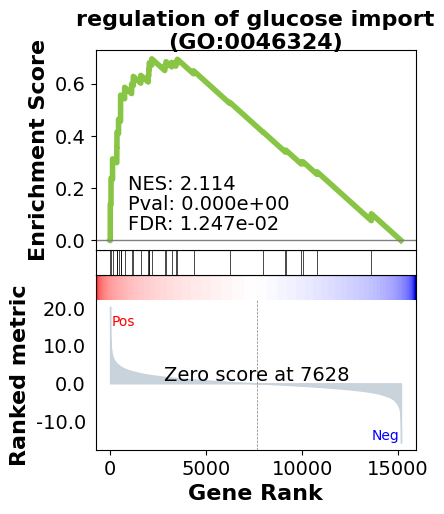

In [ ]:
# Plotting the enrichment score of the inflammatory response process
terms = pre_res.res2d.Term
axs = pre_res.plot(terms=terms[0])

## Graded Exercises (5 marks)


**GQ1: As mentioned in the Week 4 module "Intro to Differential Expression Analysis", Menke and colleagues discovered that the drug dexamethasone consistently regulates two genes: FKBP5 and DUSP1. If we refer to the clustermap generated above, we can also see an increase in DUSP1 expression. Hypothesize which other genes using the clustermap might also be regulated by dexamethasone, explain your reasoning. Also explain why we are not able to claim that the genes you have listed are regulated by dexamethasone from this bulk scRNA-seq data alone. (3 marks)**

Write Answer Below

 answer: list any of the genes that showed a similar expression difference between controls and treatments. those genes because they are showing changes in expression between the treatment and control samples, like DUSP1. but we cannot claim they are definitely being regulated by dexamthasone without performing further function studies to prove how the gene responds, potentially via a knock out or other similar test.



**GQ2. Let's explore both the clustermap and volcano plot together. What conclusions about the differences in gene expression between control and treatment groups can be drawn from both the volcano plot and clustermap? What type of information does the clustermap provide that the volcano plot does not, and why is this important in our case? What type of information does the volcano plot provide that the clustermap does not, and why is that important in our case? (5 marks)**

answer:
(1) all of the genes that are highlighted in the volcano plot can also be seen on the heatmap. this shows that those genes are highly upregulated/downregulated in both plots.
(2) the clustermaps can show the expression in all samples, individually
(3) this is important because of the treatment samples does not follow the same trend as the others and we can more clearly see which genes that effects
(4) the volcano plot can show the relative fold change and significance of each of the genes to each other
(4) this is important because it shows that genes like SPARCL1 actually have some of the highest fold change in comparison to the other highlighted genes


**GQ3.** In a Nature Neuroscience paper entitled ["Comprehensive transcriptome analysis of neocortical layers in humans, chimpanzees and macaques"](https://www.nature.com/articles/nn.4548) , He and colleagues investigated the transcriptome of cortical layers in the prefrontal cortex of humans, chimpanzees, and rhesus macaques, revealing significant species-specific expression changes, particularly in humans.

In the study the authors collected 17 layers of the prefrontal cortex (as diagramed in figure 1 of the original paper, also shown below)

![sample_schematic.png](https://drive.google.com/uc?export=view&id=1TxSv7yu1atoeUNs_fI9-lkDxufjMuCyA)

We have processed the RNA-seq data for you to generate a table that summarizes the average gene expression collected per layer in human samples, named "RPKM_section_human.csv", and a separate table summarizing the differential gene expression analysis results using techniques from Module 4, named "RPKM_results.csv".

**Similar as to what has previously been shown in this module, select the top 23 significantly differentially expressed genes based on "padj" from the differential gene expression analysis results and plot a clustermap with clustered rows and columns.The data frames mentioned above are loaded below. (3 marks)**


In [ ]:
res_df = pd.read_csv('RPKM_results.csv')
raw_count_df = pd.read_csv("RPKM_section_human.csv", header=1)

Answer:

Grading breakdown:

(1'): Correctly select top-10 genes from res_df and raw_count_df

(1'): Correctly apply control_treatment grouping

(1'): Correctly plot using normalized/unnormalized dataframe

No marks deducted from different(or no) x/y labelling, heatmap parameters

<Figure size 600x600 with 0 Axes>

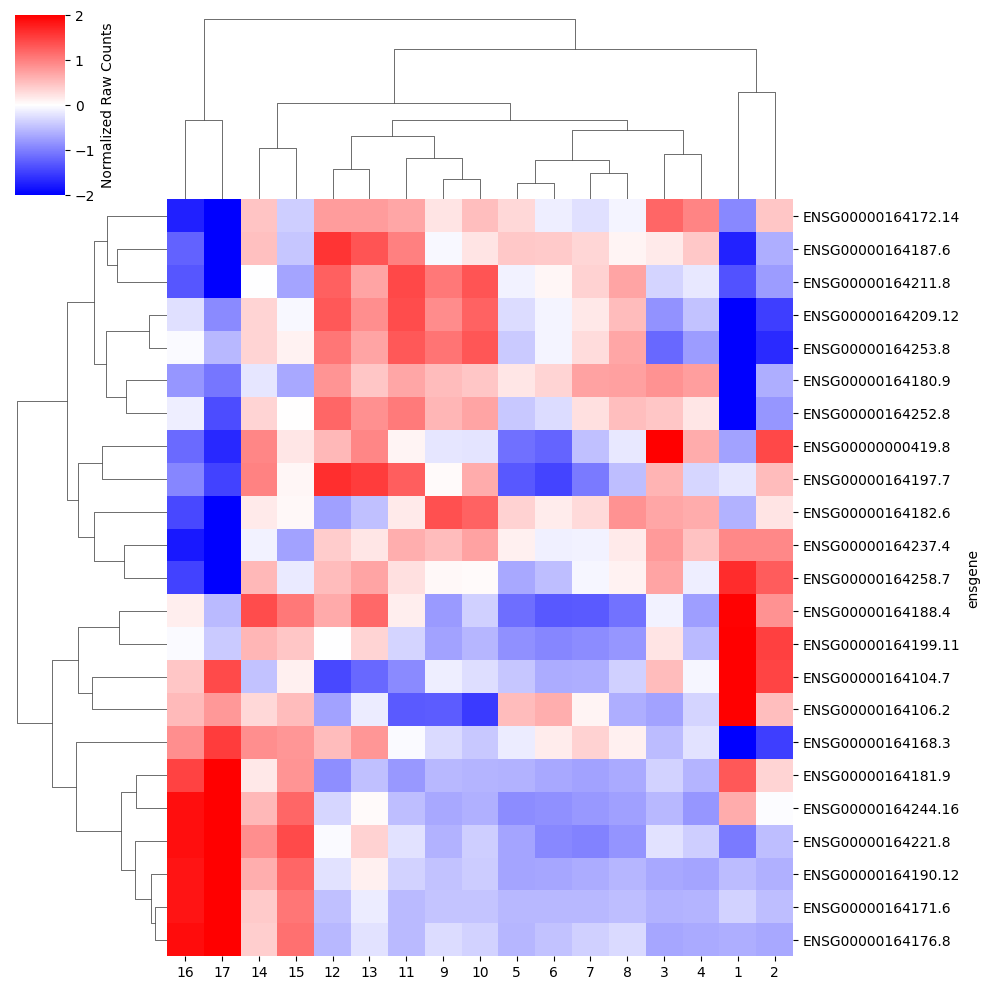

In [ ]:
significant_genes = res_df.sort_values("padj", ascending=True).head(23)["ensgene"]
filtered_df = raw_count_df[raw_count_df["ensgene"].isin(significant_genes)]
filtered_df.set_index('ensgene', inplace=True)

normalized_filtered_df = stats.zscore(filtered_df,axis=1)

plt.figure(figsize=(6, 6))
sns.clustermap(normalized_filtered_df,
                cmap='bwr',
                fmt=".2f",
                cbar_kws={'label': 'Normalized Raw Counts'},
                vmax=2,
                vmin=-2
                )
plt.show()

**GQ4. Based on the plot generated from GQ3, can you see any patterns in the clustering of the layered cortical samples. In the original paper, He and colleagues identified 6 distinct cortical layers, does this match with the plot generated from GQ3, why might our conclusions differ from those in the original paper? (3 marks)**

Sample answer: (1) the layers are clustered into groups with neighboring layers (2) no, we can see roughly 4-5 layers, which is less than the original paper (3) but we are basing clustering only on this subset of 23 gene where as the paper is using a large set of genes for clustering.

## Conclusion

In conclusion, this module has provided details to a few analysis that may be done after obtaining a table of differentially expressed genes. We touched on how to use said table to plot a volcano plot to simultaneously display the magnitude of change and the statistical significance of our results in a single, intuitive visualization. Moreover, we touched on functional analysis, where we moved beyond the list of differentially expressed genes to understand the biological implications of these changes. By grouping genes into known biological processes, our functional analysis can reveal underlying mechanisms or pathways that are affected by the experimental conditions, helping us to make more informed biological conclusions of our data.